In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os

C:\Users\srini\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
print (os.getcwd())

C:\Users\srini


In [3]:
os.chdir('C:\\Users\\srini\\Downloads\\Project Files\\Python Projects(Not Bootcamp)\\Detection of Parkinson Diesease')

In [4]:
print(os.getcwd())

C:\Users\srini\Downloads\Project Files\Python Projects(Not Bootcamp)\Detection of Parkinson Diesease


In [5]:
df=pd.read_csv('parkinsons.data')
display (df) 

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
!pip install ydata-profiling pandas jupyterlab

from ydata_profiling import ProfileReport

profile = ProfileReport(
    df,
    title="Lightweight Profiling Report",
    explorative=True,
    minimal=True,  # Enables fast mode
    progress_bar=True,
    correlations={},         # Don't compute any correlations
    missing_diagrams={"bar": True},  # Only simple missing value chart
    interactions={},         # Skip interaction checks
    duplicates={"head": 0},  # Disable duplicate check
    samples={"head": 10, "tail": 10}  # Limit preview rows shown
)

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 24/24 [00:00<00:00, 122.29it/s]A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
display (df.shape)

(195, 24)

In [8]:
print (len(df))

195


In [9]:
display (df.dtypes)

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [10]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [11]:
display (df.describe())

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [12]:
display (df.isna().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [13]:
print (df.columns)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [14]:
print (df['status'])

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


[]

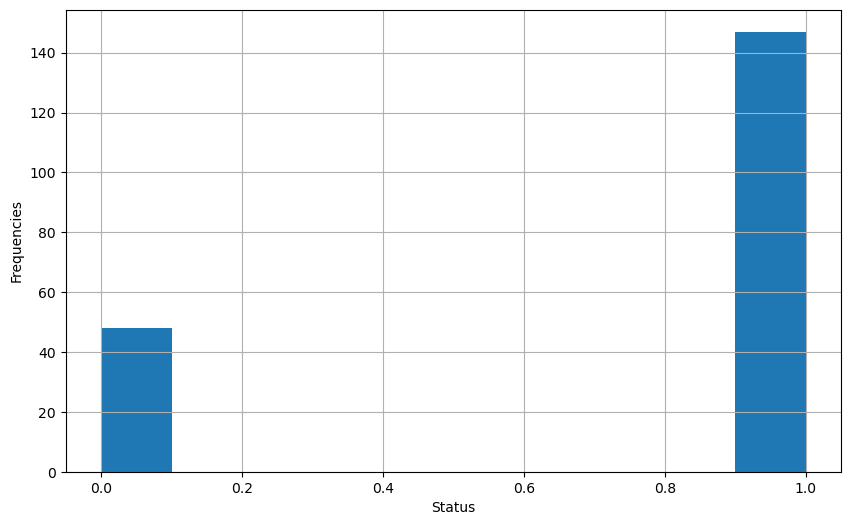

In [15]:
plt.figure(figsize=(10, 6))
df.status.hist()
plt.xlabel('Status')
plt.ylabel('Frequencies')
plt.plot()

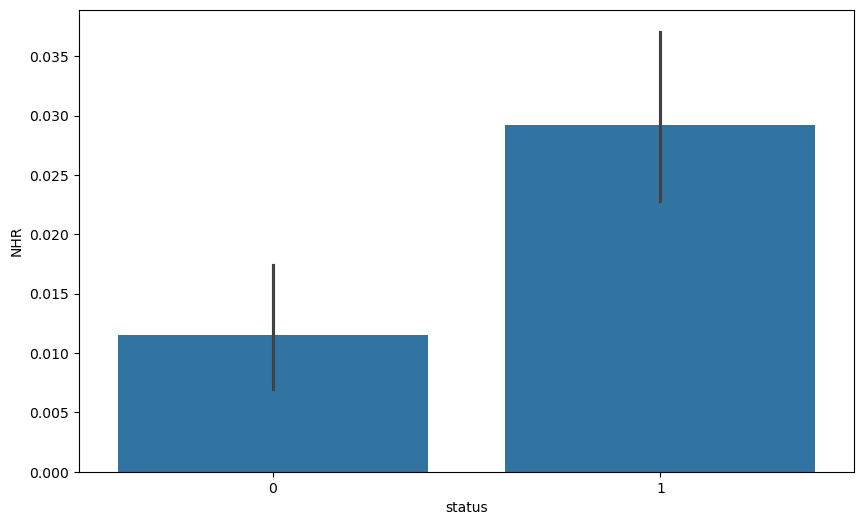

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="NHR",data=df);
plt.show()

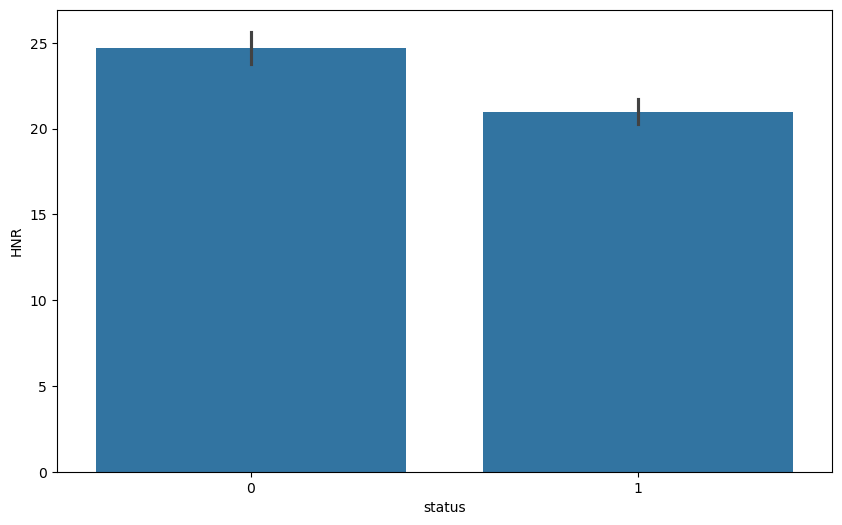

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="HNR",data=df);
plt.show()

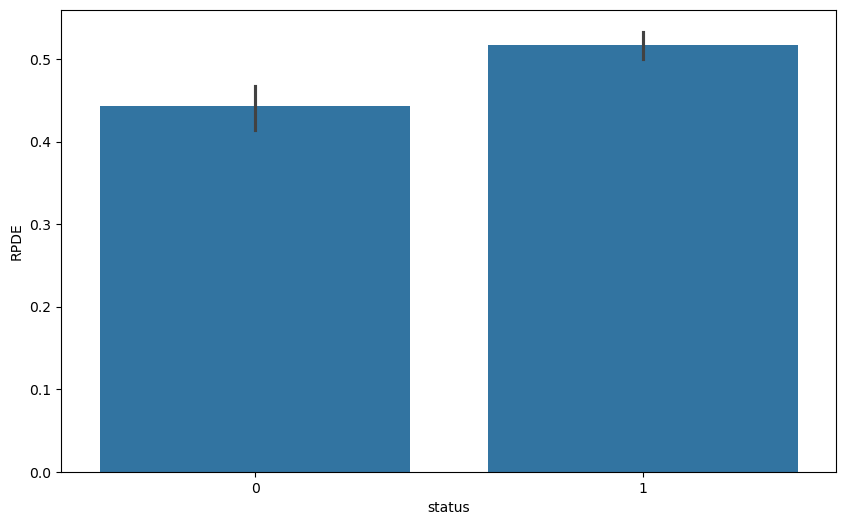

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="RPDE",data=df);
plt.show()

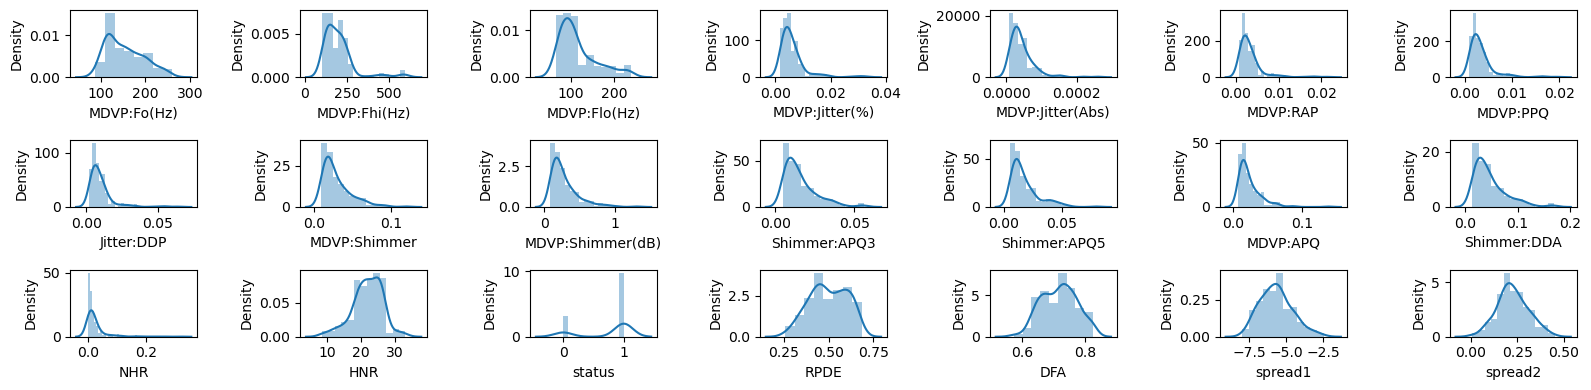

In [19]:
import warnings
warnings.filterwarnings('ignore')
rows=3
cols=7
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=df.columns
index=1
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()
plt.show()

In [20]:
corr = df.select_dtypes(include=['number']).corr()
display(corr)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


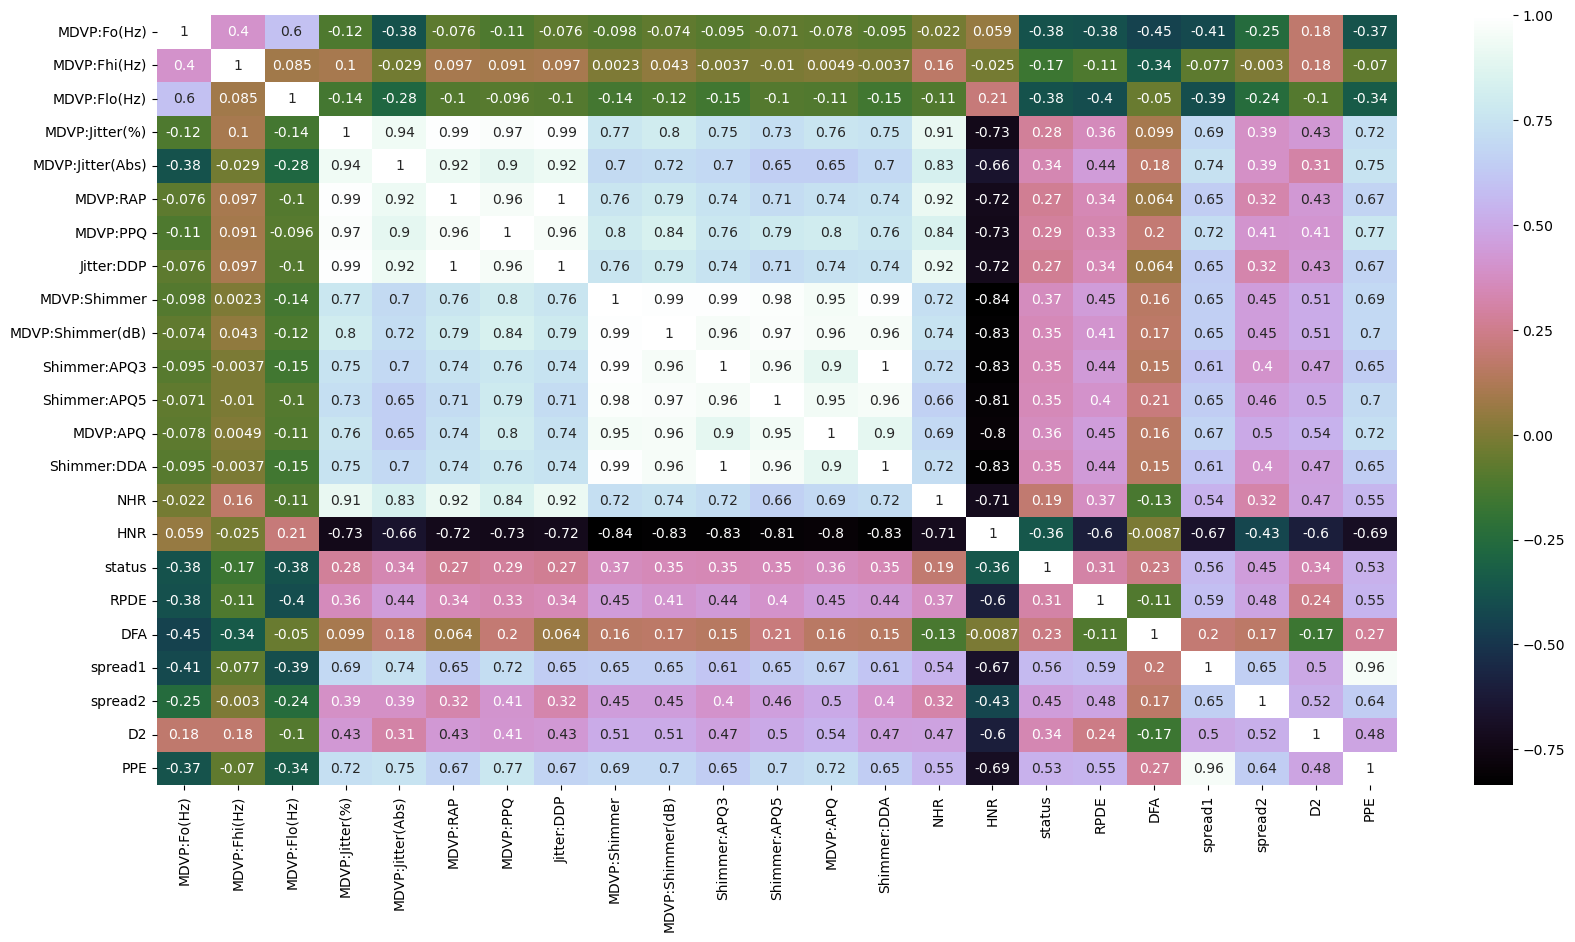

In [21]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='cubehelix',annot = True)
plt.show()

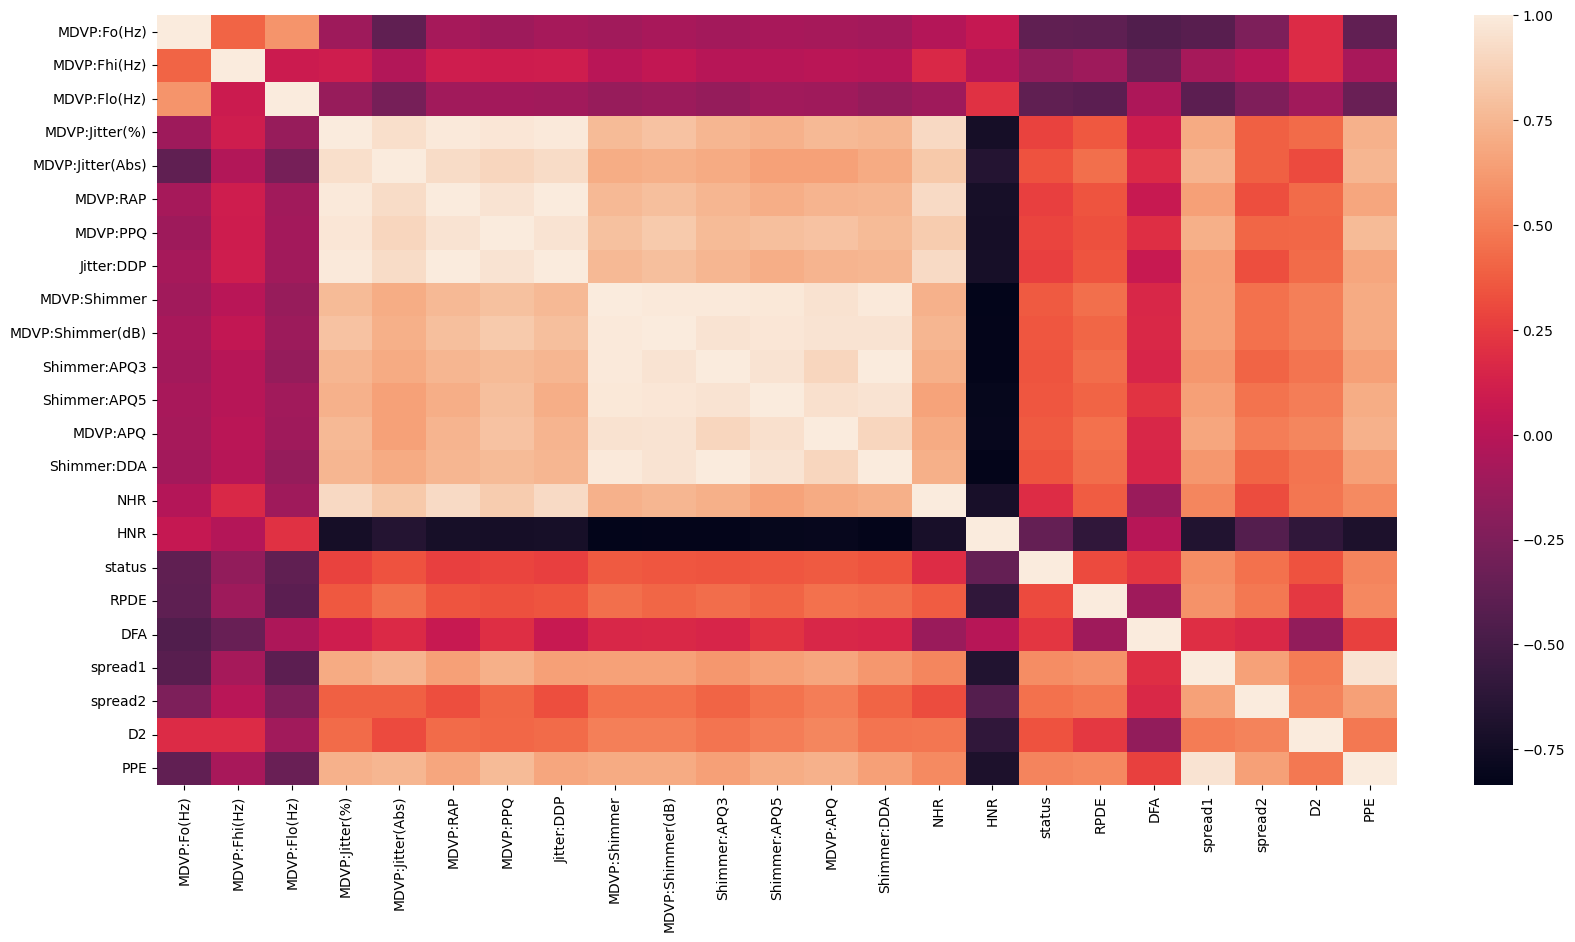

In [22]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
sns.heatmap(corr)
plt.show()

In [23]:
df.drop(['name'],axis=1,inplace=True)
display (df)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [24]:
X=df.drop(labels=['status'],axis=1)
display (X.head())

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [25]:
Y=df['status']
display (Y.head())

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print (X.shape,Y.shape)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(195, 22) (195,)
(156, 22) (39, 22) (156,) (39,)


In [27]:
#Creating Logistic Model
log_reg = LogisticRegression().fit(X_train, Y_train)
#predict on train 
train_preds = log_reg.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

#predict on test
test_preds = log_reg.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is:\n ", confusion_matrix(Y_train, train_preds))
print("confusion_matrix test is:\n ", confusion_matrix(Y_test, test_preds))
print('\nClassification Report Train is ')
print(classification_report (Y_train, train_preds))
print('\nClassification Report Test is ')
print(classification_report (Y_test, test_preds))

Model accuracy on train is:  0.8717948717948718
Model accuracy on test is:  0.8461538461538461
--------------------------------------------------
confusion_matrix train is:
  [[ 24  16]
 [  4 112]]
confusion_matrix test is:
  [[ 5  3]
 [ 3 28]]

Classification Report Train is 
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        40
           1       0.88      0.97      0.92       116

    accuracy                           0.87       156
   macro avg       0.87      0.78      0.81       156
weighted avg       0.87      0.87      0.86       156


Classification Report Test is 
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.90      0.90      0.90        31

    accuracy                           0.85        39
   macro avg       0.76      0.76      0.76        39
weighted avg       0.85      0.85      0.85        39



In [28]:
RF=RandomForestClassifier().fit(X_train,Y_train)
#predict on train 
train_preds2 = RF.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = RF.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))

#Confusion matrix
print("confusion_matrix train is:\n ", confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is:\n ", confusion_matrix(Y_test, test_preds2))
print('\nClassification Report Train is ')
print(classification_report (Y_train, train_preds2))
print('\nClassification Report Test is ')
print(classification_report (Y_test, test_preds2))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.8717948717948718
confusion_matrix train is:
  [[ 40   0]
 [  0 116]]
confusion_matrix test is:
  [[ 5  3]
 [ 2 29]]

Classification Report Train is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00       116

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156


Classification Report Test is 
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.91      0.94      0.92        31

    accuracy                           0.87        39
   macro avg       0.81      0.78      0.79        39
weighted avg       0.87      0.87      0.87        39



In [29]:
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))

5 / 39


In [30]:
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds2))

KappaScore is:  0.587737843551797


In [31]:
ddf=pd.DataFrame(data=[test_preds2,Y_test])
display (ddf)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,0,1
1,1,1,1,0,1,0,1,1,1,0,...,1,0,0,0,1,1,1,1,1,1


In [32]:
display (ddf.T)

,0,1
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,1,0
6,1,1
7,1,1
8,1,1
9,1,0


In [33]:
from sklearn.tree import DecisionTreeClassifier
#fit the model on train data 
DT = DecisionTreeClassifier().fit(X,Y)

#predict on train 
train_preds3 = DT.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = DT.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)
#Confusion matrix
print("confusion_matrix train is:\n ", confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: \n", confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)
print('\nClassification Report Train is ')
print(classification_report (Y_train, train_preds3))
print('\nClassification Report Test is ')
print(classification_report (Y_test, test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  1.0
--------------------------------------------------
confusion_matrix train is:
  [[ 40   0]
 [  0 116]]
confusion_matrix test is: 
 [[ 8  0]
 [ 0 31]]
Wrong predictions out of total
--------------------------------------------------

Classification Report Train is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00       116

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156


Classification Report Test is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        31

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      

In [34]:
# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds3))

0 / 39
--------------------------------------------------
KappaScore is:  1.0


In [35]:
from sklearn.naive_bayes import GaussianNB
#fit the model on train data 
NB=GaussianNB()
NB.fit(X_train,Y_train)
#predict on train 
train_preds4 = NB.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = NB.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)
#Confusion matrix
print("confusion_matrix train is: \n", confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is:\n ", confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)
print('\nClassification Report Train is ')
print(classification_report (Y_train, train_preds4))
print('\nClassification Report Test is ')
print(classification_report (Y_test, test_preds4))

Model accuracy on train is:  0.7307692307692307
Model accuracy on test is:  0.6923076923076923
--------------------------------------------------
confusion_matrix train is: 
 [[38  2]
 [40 76]]
confusion_matrix test is:
  [[ 8  0]
 [12 19]]
Wrong predictions out of total
--------------------------------------------------

Classification Report Train is 
              precision    recall  f1-score   support

           0       0.49      0.95      0.64        40
           1       0.97      0.66      0.78       116

    accuracy                           0.73       156
   macro avg       0.73      0.80      0.71       156
weighted avg       0.85      0.73      0.75       156


Classification Report Test is 
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         8
           1       1.00      0.61      0.76        31

    accuracy                           0.69        39
   macro avg       0.70      0.81      0.67        39
weighted avg 

In [36]:
# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds4))

12 / 39
--------------------------------------------------
KappaScore is:  0.3937823834196892


In [37]:
from sklearn.svm import SVC
#fit the model on train data 
SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train)

#predict on train 
train_preds5 = SVM.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = SVM.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)
#Confusion matrix
print("confusion_matrix train is: \n", confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is:\n ", confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

print("recall", metrics.recall_score(Y_test, test_preds5))
print('-'*50)
print('\nClassification Report Train is ')
print(classification_report (Y_train, train_preds5))
print('\nClassification Report Test is ')
print(classification_report (Y_test, test_preds5))   


Model accuracy on train is:  0.8782051282051282
Model accuracy on test is:  0.8974358974358975
--------------------------------------------------
confusion_matrix train is: 
 [[ 23  17]
 [  2 114]]
confusion_matrix test is:
  [[ 5  3]
 [ 1 30]]
Wrong predictions out of total
--------------------------------------------------
recall 0.967741935483871
--------------------------------------------------

Classification Report Train is 
              precision    recall  f1-score   support

           0       0.92      0.57      0.71        40
           1       0.87      0.98      0.92       116

    accuracy                           0.88       156
   macro avg       0.90      0.78      0.82       156
weighted avg       0.88      0.88      0.87       156


Classification Report Test is 
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.91      0.97      0.94        31

    accuracy                           0.

In [38]:
# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))
print('-'*50)
# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds5))

4 / 39
--------------------------------------------------
KappaScore is:  0.6533333333333333


In [39]:
import pickle 
# Saving model to disk
pickle.dump(SVM,open('deploy_SVM.pkl','wb'))
# Open the Pickle File 
model=pickle.load(open('deploy_SVM.pkl','rb'))
# Prediction 
print (model.predict (X_train))

[1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1]
